<a href="https://colab.research.google.com/github/miko-mm/ReDi_project_ga_ml_prediction/blob/develop/MAYC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle connection not needed anymore
\

In [0]:
# Kaggle
!pip install -q kaggle

# Kaggle token
from google.colab import files
files.upload() 

In [0]:
! mkdir ~/.kaggle

In [0]:
! cp kaggle.json ~/.kaggle/
!ls ~/.kaggle

kaggle.json


In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
!kaggle competitions download -c ga-customer-revenue-prediction -p /content/gdrive/My\ Drive/DataScience/DataAnalyticsWithPython_ReDi/Project/ga_customer-revenue-prediction

  0% 0.00/2.55M [00:00<?, ?B/s]
100% 2.55M/2.55M [00:00<00:00, 83.1MB/s]
 90% 51.0M/56.8M [00:01<00:00, 26.4MB/s]
100% 56.8M/56.8M [00:01<00:00, 31.9MB/s]
 93% 57.0M/61.1M [00:01<00:00, 30.1MB/s]
100% 61.1M/61.1M [00:01<00:00, 39.6MB/s]
 99% 1.10G/1.11G [00:25<00:00, 34.2MB/s]
100% 1.11G/1.11G [00:25<00:00, 46.7MB/s]
 96% 5.00M/5.23M [00:00<00:00, 10.8MB/s]
100% 5.23M/5.23M [00:00<00:00, 10.7MB/s]
 99% 329M/333M [00:11<00:00, 22.5MB/s]
100% 333M/333M [00:12<00:00, 29.1MB/s]


In [0]:
cd '/content/gdrive/My Drive/DataScience/DataAnalyticsWithPython_ReDi/Project/ga_customer-revenue-prediction/preprocessed_V2/unzipped/'

/content/gdrive/My Drive/DataScience/DataAnalyticsWithPython_ReDi/Project/ga_customer-revenue-prediction/preprocessed_V2/unzipped


In [0]:
ls -alFh

total 3.1G
-rw------- 1 root root 372M May  3 23:11 test_flat_no_hits.pkl
-rw------- 1 root root 208M May  4 08:56 test_hits_flat.pkl
-rw------- 1 root root 1.6G May  3 14:21 train_flat_no_hits.pkl
-rw------- 1 root root 925M May  4 08:58 train_hits_flat.pkl


In [0]:
!unzip preprocessed_ga_revenue_data_V2.zip

Archive:  preprocessed_ga_revenue_data_V2.zip
   creating: preprocessed_ga_revenue_data/
  inflating: preprocessed_ga_revenue_data/train_flat_no_hits.pkl  
  inflating: __MACOSX/preprocessed_ga_revenue_data/._train_flat_no_hits.pkl  
  inflating: preprocessed_ga_revenue_data/test_flat_no_hits.pkl  
  inflating: __MACOSX/preprocessed_ga_revenue_data/._test_flat_no_hits.pkl  
  inflating: preprocessed_ga_revenue_data/train_hits_flat.pkl  
  inflating: __MACOSX/preprocessed_ga_revenue_data/._train_hits_flat.pkl  
  inflating: preprocessed_ga_revenue_data/test_hits_flat.pkl  
  inflating: __MACOSX/preprocessed_ga_revenue_data/._test_hits_flat.pkl  


# Importing data from gdrive

In [0]:
# download the libraries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
#!pip3 install --upgrade seaborn cufflinks plotly
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline
import ast
import json
from pandas.io.json import json_normalize

In [2]:
#Mount the Google Drive to Google Colab
#1. get the library
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## DATA v2 pkl 5 GB DataSet

In [3]:
root_path = 'drive/My Drive/DataScience/DataAnalyticsWithPython_ReDi/Project/ga_customer-revenue-prediction/'
cd '/content/drive/My Drive/DataScience/DataAnalyticsWithPython_ReDi/Project/ga_customer-revenue-prediction/preprocessed_V2/unzipped/'

SyntaxError: ignored

In [4]:
pwd

'/content'

In [5]:
ls -alFh

total 20K
drwxr-xr-x 1 root root 4.0K May 19 17:53 ./
drwxr-xr-x 1 root root 4.0K May 19 17:50 ../
drwxr-xr-x 1 root root 4.0K May 18 16:14 .config/
drwx------ 3 root root 4.0K May 19 17:53 drive/
drwxr-xr-x 1 root root 4.0K May 13 16:29 sample_data/


In [0]:
# load training data set info a df
df_train=pd.read_pickle(filepath_or_buffer='/content/gdrive/My Drive/DataScience/DataAnalyticsWithPython_ReDi/Project/ga_customer-revenue-prediction/preprocessed_V2/unzipped/train_flat_no_hits.pkl')

In [0]:
del df_train

## DATA v1 csv x GB smaller 

In [5]:
ls

drive/  sample_data/


In [6]:
cd /content/drive/My\ Drive/DataScience/DataAnalyticsWithPython_ReDi/Project/ga_customer-revenue-prediction/unzipped_V1/

/content/drive/My Drive/DataScience/DataAnalyticsWithPython_ReDi/Project/ga_customer-revenue-prediction/unzipped_V1


In [0]:
root_path = 'drive/My Drive/DataScience/DataAnalyticsWithPython_ReDi/Project/ga_customer-revenue-prediction/unzipped_V1/'

In [0]:
# Data set has some columns in JSON format, need to be converted before (look below) 
df_train=pd.read_csv(filepath_or_buffer='/content/drive/My Drive/DataScience/DataAnalyticsWithPython_ReDi/Project/ga_customer-revenue-prediction/unzipped_V1/train.csv')

## Separating JSON written columns


JSON objects here are 'records' : list like [{column -> value}, ... , {column -> value}]
N{"browser": "Chrome", "browserVersion": "not a...
---


https://kanoki.org/2019/12/12/how-to-work-with-json-in-pandas/

In [0]:
# None of them works

df_device_test = pd.read_json(df_train.device, orient='records')
# df_device_test = pd.DataFrame.from_dict(a_json, orient='index')
# a_json = json.loads(df_train.device)
# df_device_test=pd.DataFrame.from_dict(a_json, orient='index')
# df_device_test=pd.io.json.json_normalize(df_train.device[0])
# df_device_test=pd.io.json.json_normalize(df_train.device.apply(json.loads))
# df_device_test = pd.concat({k: pd.DataFrame(ast.literal_eval(v)) for k, v in df_train['device'].items()})
df_device_test

In [0]:
ORIGINAL 
# j_columns = ['device', 'geoNetwork', 'totals', 'trafficSource'] # Columns that have json format
# #Code to transform the json format columns in table
# def json_to_load(data_Ml):
#     data_Ml = pd.read_csv('trainML.csv',converters={column: json.loads for column in j_columns})
#     for column in j_columns:
#         df_j_columns = json_normalize(data_Ml[column])
#         # here will be set the name using the category and subcategory of json columns
#         df_j_columns.columns = [f"{column}.{subcolumn}" for subcolumn in df_j_columns.columns]
#         #let drop the original columns
#         data_Ml = data_Ml.drop(column, axis=1).merge(df_j_columns,right_index=True, left_index=True)
#     return data_Ml

In [0]:
# Read and convert json columns into 

# Columns that have json format
j_columns = ['device', 'geoNetwork', 'totals', 'trafficSource'] 
# Code to transform the json format columns in table
def json_to_load(df_temp_col_json):
    df_temp_col_json = pd.read_csv('train.csv',converters={column: json.loads for column in j_columns})
    for column in j_columns:
        df_j_columns = json_normalize(df_temp_col_json[column])
        # here will be set the name using the category and subcategory of json columns
        df_j_columns.columns = [f"{column}.{subcolumn}" for subcolumn in df_j_columns.columns]
        #let drop the original columns
        df_temp_col_json = df_temp_col_json.drop(column, axis=1).merge(df_j_columns,right_index=True, left_index=True)
    return df_temp_col_json

In [0]:
del df_train

In [0]:
df_train = json_to_load('train.csv')

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 55 columns):
 #   Column                                             Non-Null Count   Dtype 
---  ------                                             --------------   ----- 
 0   channelGrouping                                    903653 non-null  object
 1   date                                               903653 non-null  int64 
 2   fullVisitorId                                      903653 non-null  object
 3   sessionId                                          903653 non-null  object
 4   socialEngagementType                               903653 non-null  object
 5   visitId                                            903653 non-null  int64 
 6   visitNumber                                        903653 non-null  int64 
 7   visitStartTime                                     903653 non-null  int64 
 8   device.browser                                     903653 non-null  object
 9   devi

In [19]:
df_train.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserVersion,device.browserSize,device.operatingSystem,device.operatingSystemVersion,device.isMobile,device.mobileDeviceBranding,device.mobileDeviceModel,device.mobileInputSelector,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.flashVersion,device.language,device.screenColors,device.screenResolution,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.country,geoNetwork.region,geoNetwork.metro,geoNetwork.city,geoNetwork.cityId,geoNetwork.networkDomain,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.networkLocation,totals.visits,totals.hits,totals.pageviews,totals.bounces,totals.newVisits,totals.transactionRevenue,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.keyword,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.isTrueDirect,trafficSource.referralPath,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adContent,trafficSource.campaignCode
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Asia,Western Asia,Turkey,Izmir,(not set),Izmir,not available in demo dataset,ttnet.com.tr,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Oceania,Australasia,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Europe,Southern Europe,Spain,Community of Madrid,(not set),Madrid,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not ava

## Converting dates

In [0]:
# convert date to datetime
df_train['date'] = pd.to_datetime(df_train["date"], format="%Y%m%d") 

# add more detailed data columns
df_train['year'] = df_train['date'].dt.year #for year
df_train['day'] = df_train.date.dt.day_name() #for day
df_train['week'] = df_train.date.dt.weekofyear #week
df_train['month'] = df_train.date.dt.month_name() #month

# or like that 
# df_train.index = pd.to_datetime(df_train['date'].astype(str).apply(lambda date: f'{date[:4]}-{date[4:6]}-{date[6:]}'))

In [21]:
df_train.describe(include='all')

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserVersion,device.browserSize,device.operatingSystem,device.operatingSystemVersion,device.isMobile,device.mobileDeviceBranding,device.mobileDeviceModel,device.mobileInputSelector,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.flashVersion,device.language,device.screenColors,device.screenResolution,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.country,geoNetwork.region,geoNetwork.metro,geoNetwork.city,geoNetwork.cityId,geoNetwork.networkDomain,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.networkLocation,totals.visits,totals.hits,totals.pageviews,totals.bounces,totals.newVisits,totals.transactionRevenue,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.keyword,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.isTrueDirect,trafficSource.referralPath,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adContent,trafficSource.campaignCode,year,day,week,month
count,903653,903653,9.036530e+05,903653,903653,9.036530e+05,903653.000000,9.036530e+05,903653,903653,903653,903653,903653,903653,903653,903653,903653,903653,903653,903653,903653,903653,903653,903653,903653,903653,903653,903653,903653,903653,903653,903653,903653,903653,903653,903653,903653,903553,450630,703060,11515,903653,903653,903653,400724,903653,274005,330941,21460,21460,21561,21460,21460,10946,1,903653.000000,903653,903653.000000,903653
unique,8,366,7.427350e+05,902755,1,NaN,NaN,NaN,54,1,1,20,1,2,1,1,1,1,1,1,1,1,1,3,6,23,222,376,94,649,1,28064,1,1,1,1,274,213,1,1,5332,10,380,7,3659,1,1,1475,8,2,17774,2,1,44,1,NaN,7,NaN,12
top,Organic Search,2016-11-28 00:00:00,8.248397e+17,5300254668566629656_1476860156,Not Socially Engaged,NaN,NaN,NaN,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,16990000,(not set),google,organic,(not provided),not available in demo dataset,True,/,1,Top,Cj0KEQjwmIrJBRCRmJ_x7KDo-9oBEiQAuUPKMufMpuG3Zd...,Google Search,False,Google Merchandise Collection,11251kjhkvahf,NaN,Tuesday,NaN,November
freq,381561,4807,2.050000e+02,2,903653,NaN,NaN,NaN,620364,903653,903653,350072,903653,664530,903653,903653,903653,903653,903653,903653,903653,903653,903653,664479,450377,390657,364744,508229,508229,508229,903653,244881,903653,903653,903653,903653,446754,452522,450630,703060,256,865347,400788,381561,366363,903653,274005,75523,21362,20956,70,21453,21460,5122,1,NaN,147279,NaN,113972
first,NaN,2016-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2017-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.485007e+09,2.264897,1.485007e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [0]:
df_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 59 columns):
 #   Column                                             Non-Null Count   Dtype         
---  ------                                             --------------   -----         
 0   channelGrouping                                    903653 non-null  object        
 1   date                                               903653 non-null  datetime64[ns]
 2   fullVisitorId                                      903653 non-null  object        
 3   sessionId                                          903653 non-null  object        
 4   socialEngagementType                               903653 non-null  object        
 5   visitId                                            903653 non-null  int64         
 6   visitNumber                                        903653 non-null  int64         
 7   visitStartTime                                     903653 non-null  int64         
 8   devi

In [0]:
df_train.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserVersion,device.browserSize,device.operatingSystem,device.operatingSystemVersion,device.isMobile,device.mobileDeviceBranding,device.mobileDeviceModel,device.mobileInputSelector,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.flashVersion,device.language,device.screenColors,device.screenResolution,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.country,geoNetwork.region,geoNetwork.metro,geoNetwork.city,geoNetwork.cityId,geoNetwork.networkDomain,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.networkLocation,totals.visits,totals.hits,totals.pageviews,totals.bounces,totals.newVisits,totals.transactionRevenue,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.keyword,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.isTrueDirect,trafficSource.referralPath,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adContent,trafficSource.campaignCode,year,day,week,month
0,Organic Search,2016-09-02,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Asia,Western Asia,Turkey,Izmir,(not set),Izmir,not available in demo dataset,ttnet.com.tr,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,Friday,35,September
1,Organic Search,2016-09-02,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Oceania,Australasia,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,Friday,35,September
2,Organic Search,2016-09-02,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Europe,Southern Europe,Spain,Community of Madrid,(not set),Madrid,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,Friday,35,September
3,Organic Search,2016-09-02,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not av

# Cleaning the data

## Dealing with NULLs

In [0]:
df_train.isnull().sum().sort_values(ascending = False)

trafficSource.campaignCode                           903652
trafficSource.adContent                              892707
totals.transactionRevenue                            892138
trafficSource.adwordsClickInfo.page                  882193
trafficSource.adwordsClickInfo.slot                  882193
trafficSource.adwordsClickInfo.isVideoAd             882193
trafficSource.adwordsClickInfo.adNetworkType         882193
trafficSource.adwordsClickInfo.gclId                 882092
trafficSource.isTrueDirect                           629648
trafficSource.referralPath                           572712
trafficSource.keyword                                502929
totals.bounces                                       453023
totals.newVisits                                     200593
totals.pageviews                                        100
device.mobileDeviceMarketingName                          0
device.flashVersion                                       0
device.browserSize                      

In [0]:
# Doesn't work
### get # of NULLs with # of nunique per column
# df_train.isnull().sum().sort_values(ascending = False)
df_train.isnull().agg(['sum']).sort_values['all'](ascending = False)
#.agg(['mean','median'])['Fare']

TypeError: ignored

In [0]:
df_train['trafficSource.campaignCode'].value_counts()

11251kjhkvahf    1
Name: trafficSource.campaignCode, dtype: int64

In [0]:
df_train['trafficSource.campaignCode'].unique()

array([nan, '11251kjhkvahf'], dtype=object)

In [0]:
df_train['trafficSource.adContent'].unique()

## Missing Value occurrence

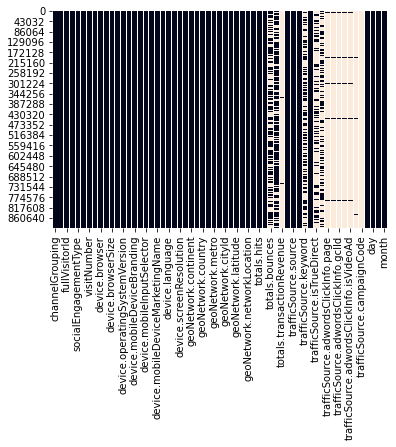

In [22]:
# 1.7 M rows dataset (the first one, with 5GB RAM df) consumes over 12 GB of RAM on collab, which CAUSES CRASH 
# 0.9 M rows dataset (the second one, with 1.5 GB df) consumes 8.5 GB 
sns.heatmap(df_train.isnull(), cbar=False)

In [16]:
!pip install missingno
import missingno as msno

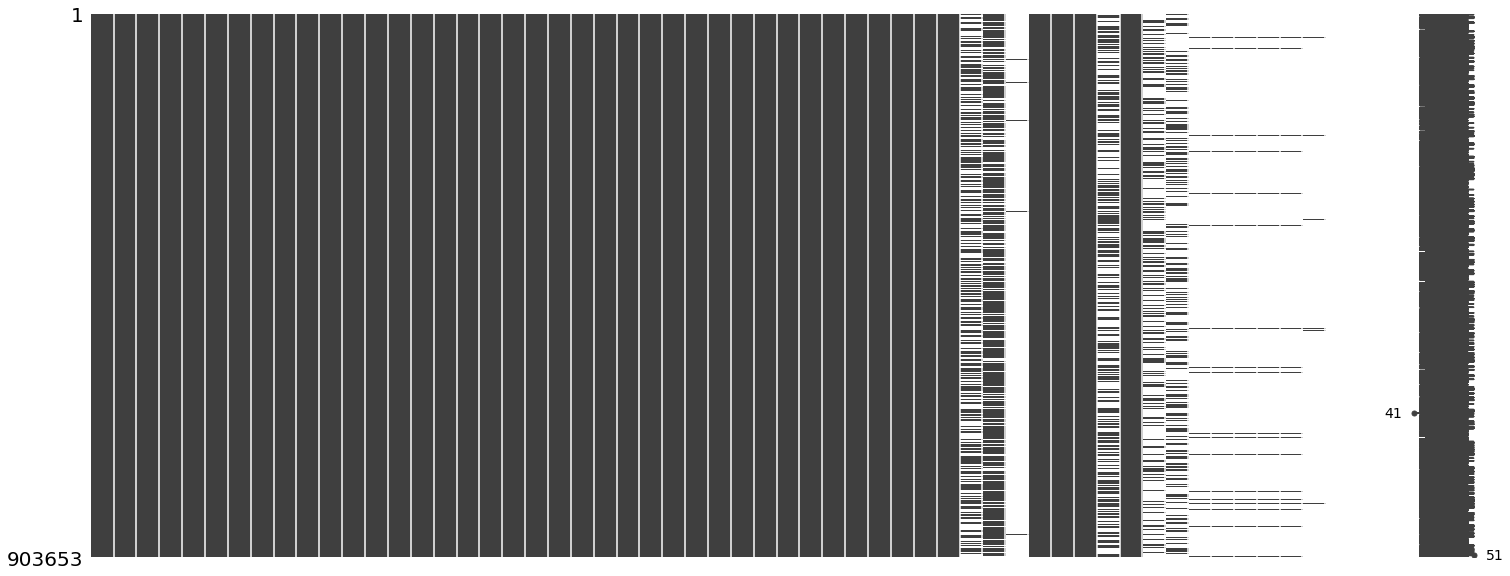

In [17]:
msno.matrix(df_train)

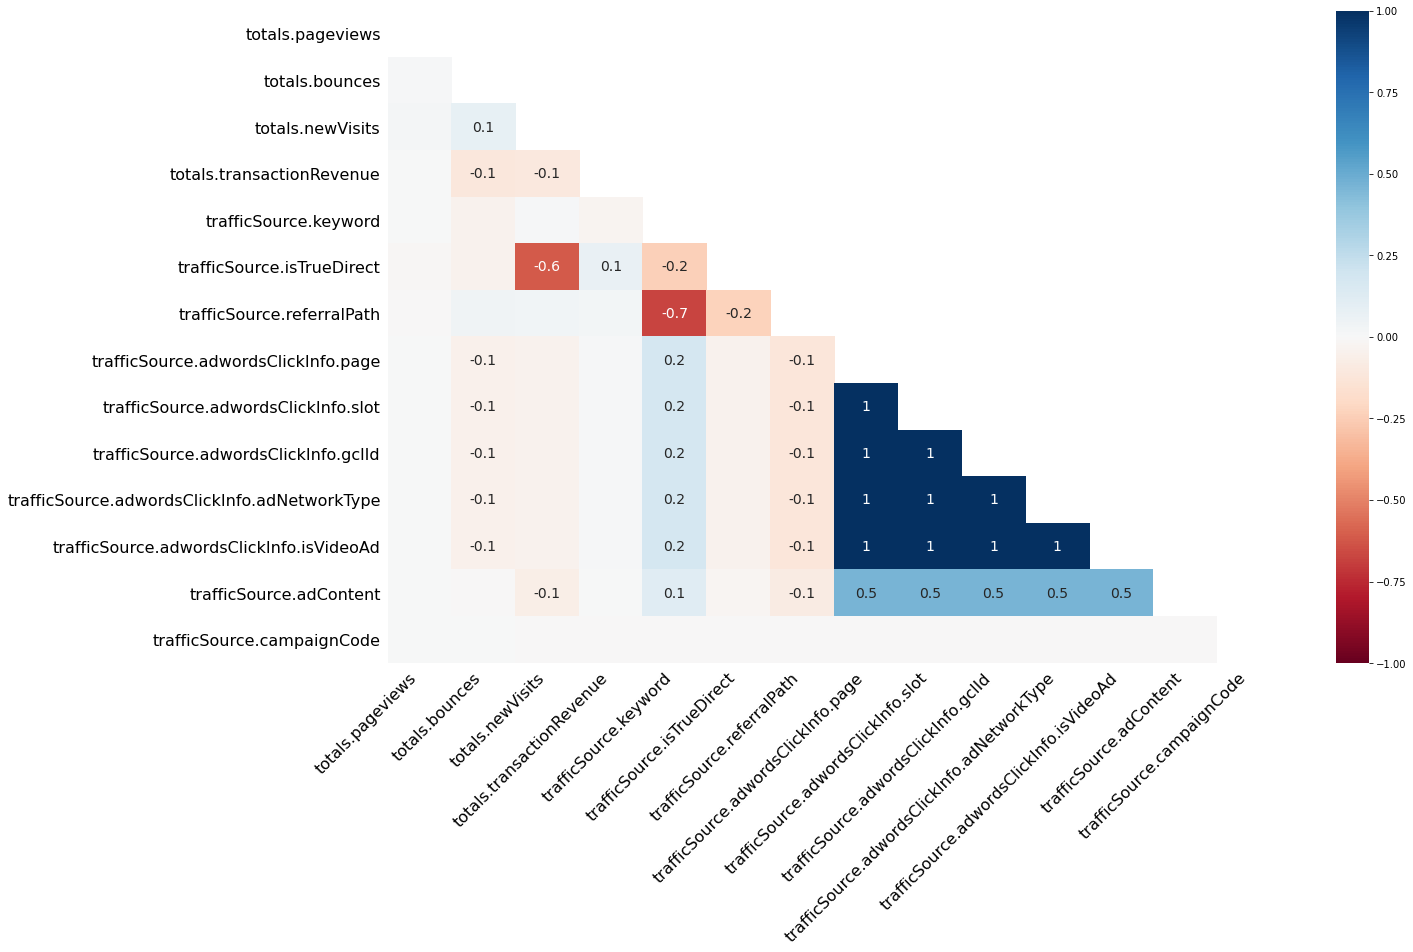

In [18]:
msno.heatmap(df_train)

# What the columns mean

Each row in the dataset is one visit to the store. 
We are predicting the log of the total revenue per user.
Be aware that not all rows in test.csv will correspond to a row in the submission, but all unique fullVisitorIds will correspond to a row in the submission.

# EDA

### Miko's question : "What is the most frequent channel grouping."

In [0]:
cont_bar_plot_data = df_train.groupby(['geoNetwork.continent', 'device.isMobile']).count()['fullVisitorId'].reset_index()
cont_bar_plot_data.rename(columns = {'geoNetwork.continent': 'continent', 'device.isMobile': 'isMobile', 'fullVisitorId': 'total'}, inplace = True)
#Device and location
plt.figure(figsize=(25,5))
sns.barplot(x="continent",y = 'total', hue ="isMobile",  data=cont_bar_plot_data)

In [0]:
plt.figure(figsize=(25,5))

sns.boxplot(x= str(df_train.date), y= "fullVisitorId", data=df_train)
plt.xticks(rotation=45)

In [0]:
df_train['channelGrouping']

0          Organic Search
1                Referral
2                  Direct
3          Organic Search
4          Organic Search
                ...      
1708332            Social
1708333            Social
1708334            Social
1708335            Social
1708336            Social
Name: channelGrouping, Length: 1708337, dtype: object

In [0]:
df_train.groupby(['channelGrouping'])['visitId'].count().reset_index().sort_values('visitId', ascending=False)

,channelGrouping,visitId
4,Organic Search,738963
7,Social,354971
2,Direct,273134
6,Referral,211307
3,Display,51283
5,Paid Search,45627
1,Affiliates,32915
0,(Other),137


In [0]:
df_train.iloc[0]

channelGrouping                                                     Organic Search
date                                                                      20171016
fullVisitorId                                                  3162355547410993243
socialEngagementType                                          Not Socially Engaged
visitId                                                                 1508198450
visitNumber                                                                      1
visitStartTime                                                          1508198450
device.browser                                                             Firefox
device.browserVersion                                not available in demo dataset
device.browserSize                                   not available in demo dataset
device.operatingSystem                                                     Windows
device.operatingSystemVersion                        not available in demo dataset
devi

In [0]:
sns.boxplot(df_train[''])

In [0]:
monthly_visits = df_train[['totals.visits']].astype(int).resample('M').sum()